## Оптимизация
- Градиентный спуск
- Bias-variance trade off
- Регуляризация в мл моделяй и нейросетях
- Оптимизаторы в нейросетях

## Градиентный спуск (Gradient Descent, GD)

Градиентный спуск — это метод итеративной минимизации функции, чаще всего функции потерь \(L(w)\) в машинном обучении.  
Идея: идти в направлении **отрицательного градиента**, чтобы уменьшать функцию:

$$
w_{k+1} = w_k - \eta \nabla L(w_k)
$$

где: 
$$
w_k \text{ — текущее значение параметров}
$$

$$
\eta \text{ — шаг обучения (learning rate)}
$$

$$
\nabla L(w_k) \text{ — градиент функции потерь в точке } w_k
$$
 Как работает градиентный спуск

- Алгоритм оптимизирует модель с целью минимизации функции потерь.

- Функция потерь измеряет, насколько хорошо модель соответствует обучающим данным, и определяет разницу между предсказанными и реальными значениями.

- Градиент функции потерь — это производная по отношению к параметрам модели и указывает направление наибольшего возрастания функции.

- Алгоритм начинается с начального набора параметров и обновляет их маленькими шагами, чтобы минимизировать функцию потерь.

- На каждой итерации алгоритм вычисляет градиент функции потерь по каждому параметру.

- Градиент показывает направление наибольшего возрастания, а двигаясь в противоположном направлении, можно найти направление наибольшего убывания.

- Шаг обучения (learning rate) контролирует размер шага, определяя, насколько быстро алгоритм движется к минимуму.

- Процесс повторяется, пока функция потерь не сойдётся к минимуму, что означает достижение оптимального набора параметров.

- Существуют различные варианты градиентного спуска: пакетный (batch), стохастический (stochastic) и мини-батч (mini-batch), каждый со своими преимуществами и ограничениями.

- Эффективная реализация градиентного спуска важна для хорошей производительности в задачах машинного обучения. Выбор шага обучения и количества итераций может значительно повлиять на результаты алгоритма.
---

###  Варианты градиентного спуска
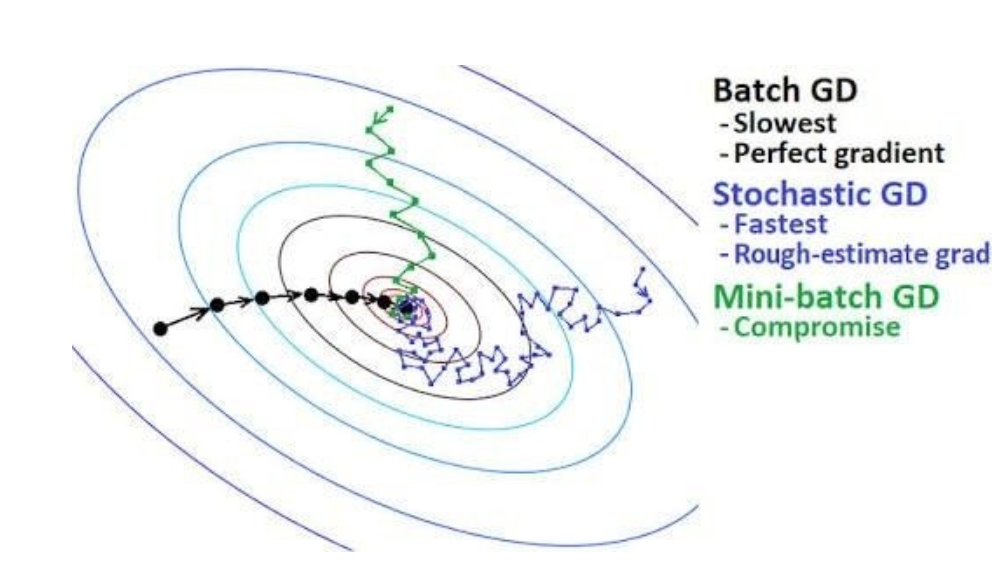
- 

**Batch GD**  
Batch gradient descent updates the model’s parameters using the gradient of the entire training set. It calculates the average gradient of the cost function for all the training examples and updates the parameters in the opposite direction. Batch gradient descent guarantees convergence to the global minimum but can be computationally expensive and slow for large datasets.

**Stochastic GD (SGD)**  
Stochastic gradient descent updates the model’s parameters using the gradient of one training example at a time. It randomly selects a training dataset example, computes the gradient of the cost function for that example, and updates the parameters in the opposite direction. Stochastic gradient descent is computationally efficient and can converge faster than batch gradient descent. However, it can be noisy and may not converge to the global minimum.

**Mini-batch GD**  
Mini-batch gradient descent updates the model’s parameters using the gradient of a small batch size of the training dataset, known as a mini-batch. It calculates the average gradient of the cost function for the mini-batch and updates the parameters in the opposite direction. The mini-batch gradient descent algorithm combines the advantages of batch and stochastic gradient descent. It is the most commonly used method in practice. It is computationally efficient and less noisy than stochastic gradient descent while still being able to converge to a good solution. 

---

##№ Что важно при использовании

**Шаг обучения**  

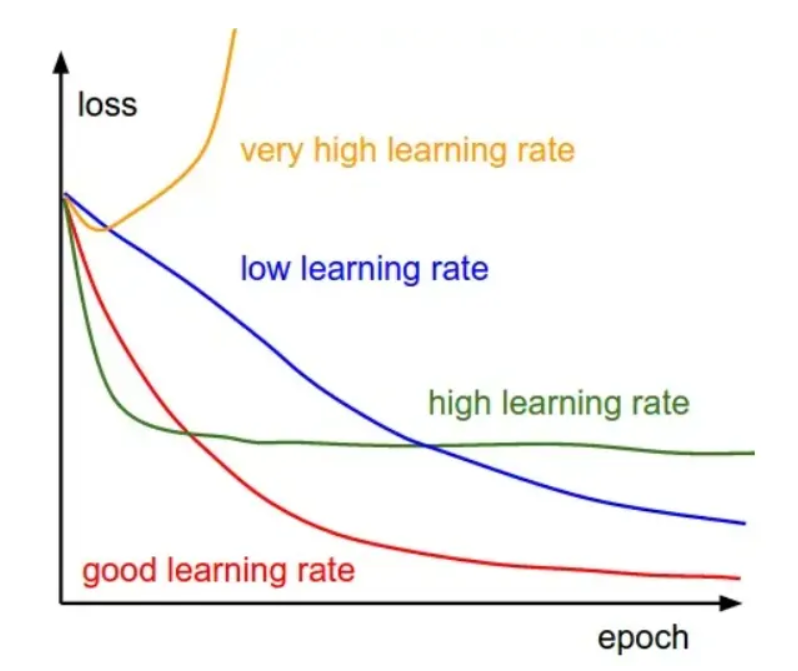

**Инициализация (w_0)**  
- Иногда влияет на скорость и стабильность сходимости.  

**Критерий остановки**  
- Достижение минимума (градиент близок к нулю)  
- Максимальное число итераций  
- Изменение функции потерь меньше порога  

**Нормализация признаков**  
- Ускоряет сходимость и делает шаг обучения более стабильным.  



In [1]:
import numpy as np
def gradient_descent(X, y, learning_rate, num_iters):
  """
  Performs gradient descent to find optimal weights and bias for linear regression.
  Args:
      X: A numpy array of shape (m, n) representing the training data features.
      y: A numpy array of shape (m,) representing the training data target values.
      learning_rate: The learning rate to control the step size during updates.
      num_iters: The number of iterations to perform gradient descent.
  Returns:
      A tuple containing the learned weights and bias.
  """
  # Initialize weights and bias with random values
  m, n = X.shape
  weights = np.random.rand(n)
  bias = 0
  # Loop for the number of iterations
  for i in range(num_iters):
    # Predict y values using current weights and bias
    y_predicted = np.dot(X, weights) + bias
    # Calculate the error
    error = y - y_predicted
    # Calculate gradients for weights and bias
    weights_gradient = -2/m * np.dot(X.T, error)
    bias_gradient = -2/m * np.sum(error)
    # Update weights and bias using learning rate
    weights -= learning_rate * weights_gradient
    bias -= learning_rate * bias_gradient
  return weights, bias
# Example usage
X = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([2, 4, 5])
learning_rate = 0.01
num_iters = 100
weights, bias = gradient_descent(X, y, learning_rate, num_iters)
print("Learned weights:", weights)
print("Learned bias:", bias)

Learned weights: [0.97651474 0.73302846]
Learned bias: 0.1845785762608788


## Bias-Variance

**Bias** - The inability for a machine learning method to capture the true relationship.

**Variance** - The difference in  fits between data sets.

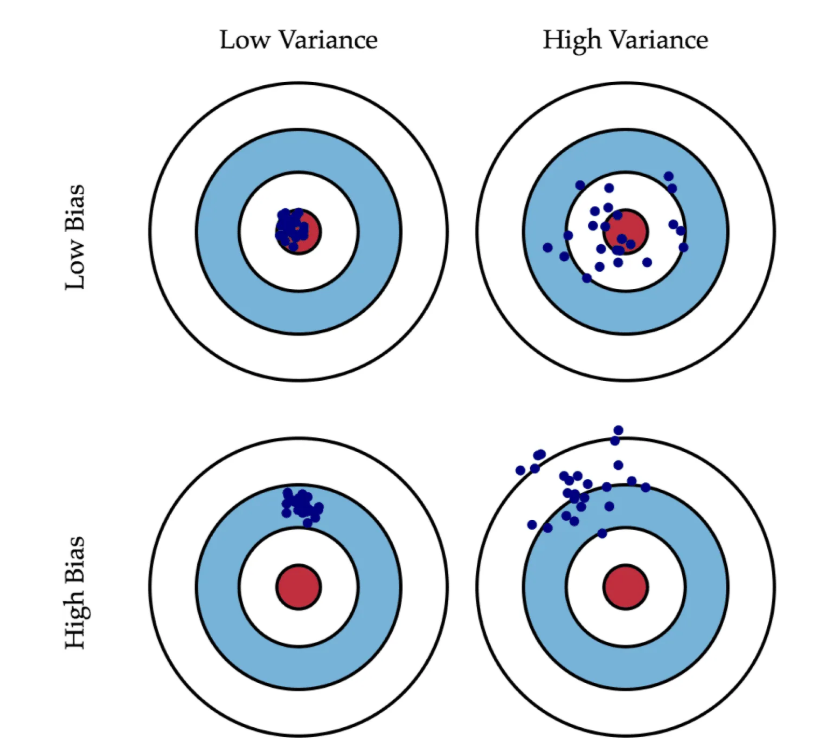

---

**Идеал** в обучении модели — низкий bias и низкий variance.
- не слишком чувствительна к шуму и новым данным (не слишком сложная → низкий variance).
- хорошо улавливает закономерности (не слишком простая → низкий bias),

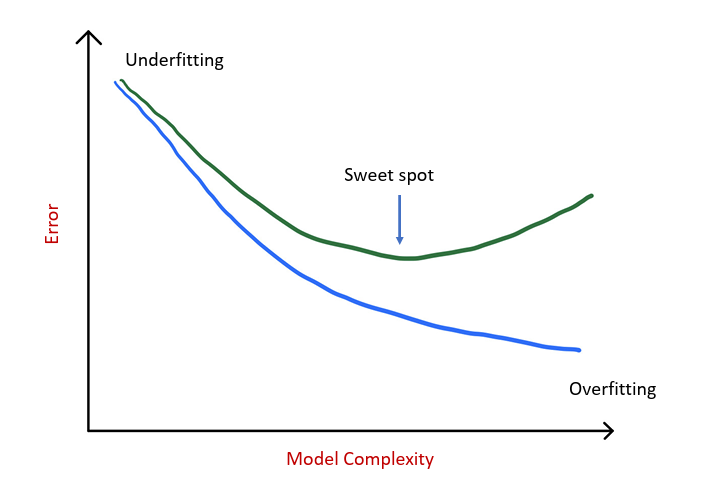

### Bias Variance Tradeoff
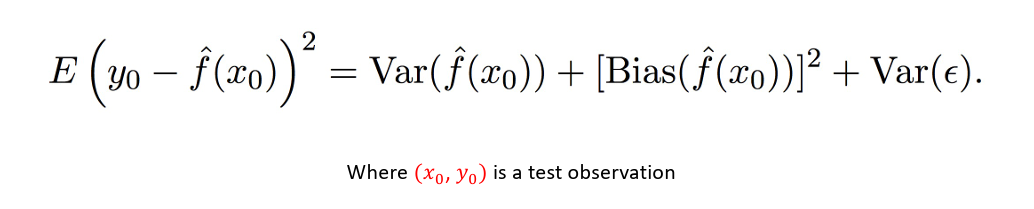

Typically, as the flexibility or complexity of 𝑓 increases, its variance increases, and its bias decreases. So choosing the flexibility based on average test error amounts to a bias-variance trade-off. 

## Регуляризация

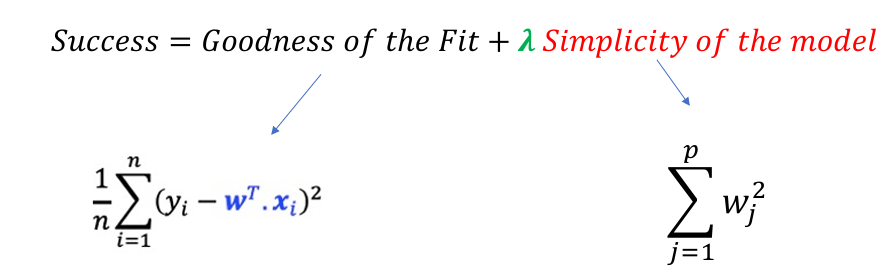

### L2 регуляризация(Ridge)
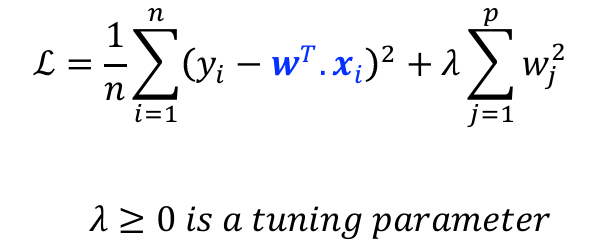
- If 𝜆 is at a “good” value, regularization helps to avoid overfitting
- Choosing 𝜆 may be hard: cross-validation is often used 
- If there are irrelevant features in the input (i.e. features that do not affect the output), 𝑳𝟐 will give them small, but non-zero weights 
- Ideally, irrelevant input should have weights exactly equal to 0

### L1 регуляризация(Lasso)
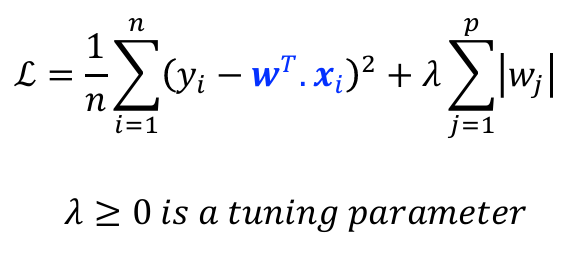
- Similar to 𝑳𝟐, 𝑳𝟏 shrinks the coefficient estimates towards zero
- However, 𝑳𝟏 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter 𝜆 is sufficiently large
- Hence, much like best subset selection, 𝑳𝟏 performs variable selection 
- As a result, models are generally much easier to interpret 
- We say that the 𝑳𝟏 yields sparse models 

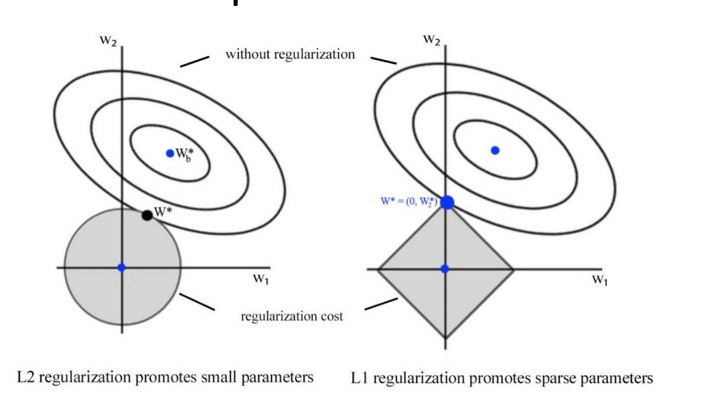

### Elastic Net
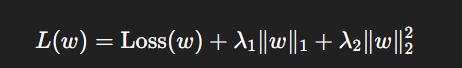
- Метод регуляризации, который объединяет L1 и L2 штрафы.
- Даёт sparsity (как L1),
- Устойчивость при коррелированных признаках (как L2).
